<a href="https://colab.research.google.com/github/abdulSalamKagaji97/AbdulSalamKagaji_DATA606/blob/main/src/draft_proposal_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly as px
# plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/abdulSalamKagaji97/AbdulSalamKagaji_DATA606/main/data/apps.csv')

df.drop_duplicates(subset='App', inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()
#print(len(df))

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [4]:
df.describe()

,Rating,Reviews,Size
count,8196.000000,9.659000e+03,8432.000000
mean,4.173243,2.165926e+05,20.395327
std,0.536625,1.831320e+06,21.827509
min,1.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000
50%,4.300000,9.670000e+02,12.000000
75%,4.500000,2.940100e+04,28.000000
max,5.000000,7.815831e+07,100.000000


## Data Cleaning


In [5]:

df['Installs'] = df['Installs'].apply(lambda x: int(x.replace('+', '').replace(",","")))



In [6]:

df['Size'] = df['Size'].apply(lambda x: str(str(x).replace('Varies with device', 'NaN').replace('M',"").replace(',', '')))
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))


## Basic EDA

In [7]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [20]:

# df.columns
df = df.dropna()
temp_df = df[['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']]
# display(df)
# plot = sns.pairplot(temp_df, hue='Type', palette="Set2")
plot = px.express.scatter_matrix(temp_df)
plot.show()

## Apps per category

In [9]:
number_of_apps_in_category = df['Category'].value_counts().sort_values(ascending=True)

temp_df = pd.DataFrame(number_of_apps_in_category).reset_index()
temp_df.columns = ['Category','app_count']
fig = px.express.pie(temp_df, values='app_count', names='Category', title='Apps per category')
fig.show()

- Family and game applications have the most market share. 

## Comparision between paid and free apps

In [10]:
paid_df = df[df.Type == 'Paid']
free_df = df[df.Type != 'Paid']

# temp_df = df.groupby(by=['Category','Type']).Rating.mean()
# temp_df = temp_df.reset_index()
# # px.express.bar(temp_df)
# # px.show()
# temp_df

paid_df = paid_df.groupby("Category").Rating.mean().reset_index().sort_values('Rating')
free_df = free_df.groupby("Category").Rating.mean().reset_index().sort_values("Rating")

f = px.express.bar(paid_df,x="Category",y='Rating', title = "Average rating of paid app categories", color = "Category")
f.show()
f = px.express.bar(free_df,x="Category",y='Rating', title = "Average rating of free app categores", color="Category")
f.show()

News and Magazines app seem to have high rating average in paid type, where as Events occupies the highest ratings in the free type apps.

# Does size impact downloads of the app and ratings of the app?

In [11]:
temp_df = df.groupby("Category").mean()
temp_df = temp_df.reset_index()
temp_df = temp_df[['Category','Size','Installs','Rating']]
px.express.scatter_matrix(temp_df[['Size','Installs','Rating']])

- It could be observed that the size of the app has a clear impact on the ratings and number of installs of the app.

# Does app prices impact app rating?

In [12]:
temp_df = df.groupby("Category").mean()
temp_df = temp_df.reset_index()
temp_df = temp_df[['Category','Price','Rating']]
# display(temp_df)
px.express.scatter_matrix(temp_df[['Price','Rating']])

- Pricing of an app clearly affects the rating and mostly the apps with 0 price have the most number of reviews, this could also be linked to number of downloads.

# Correlations Matrix

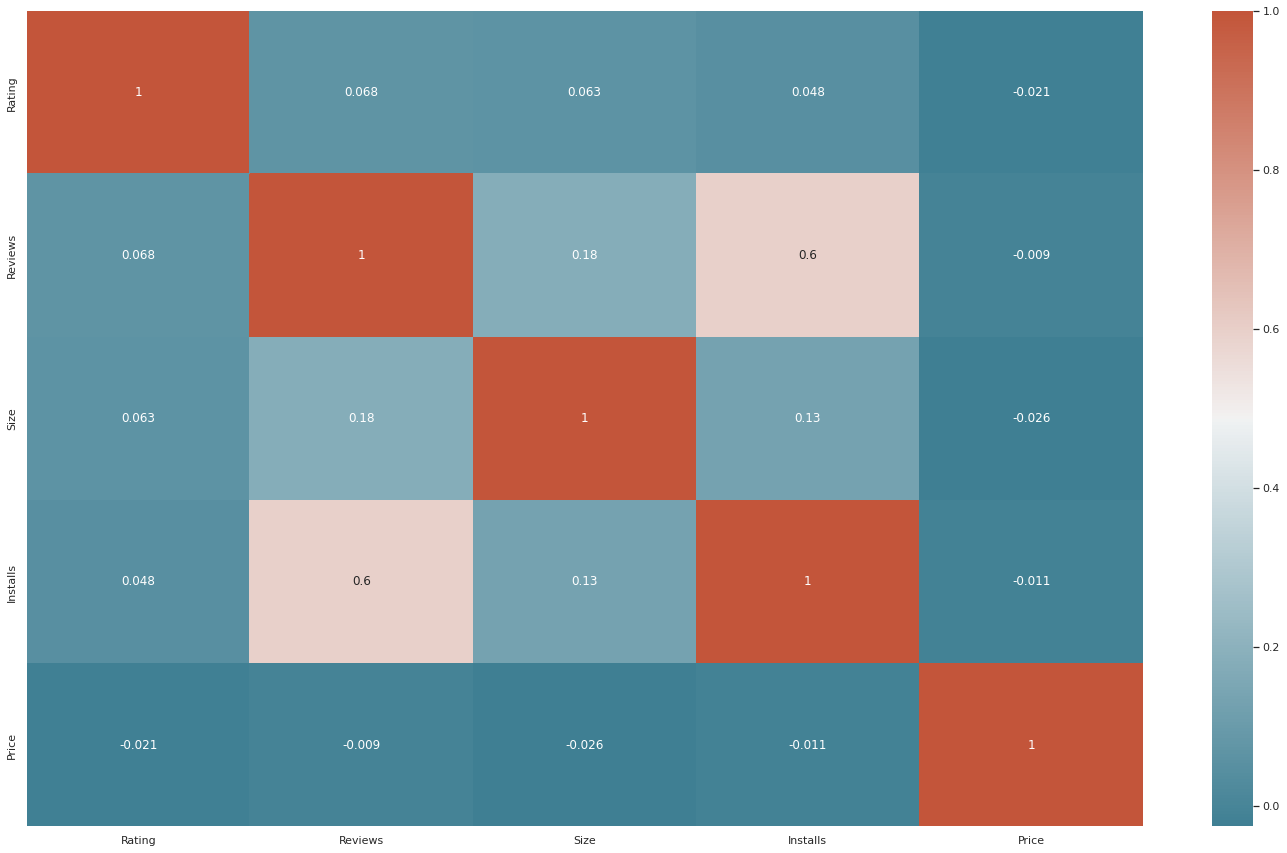

In [13]:

corr = df.corr()
p =sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

The number of reviews and the number of downloads have a moderate positive association of 0.63. This means that customers are more likely to download an app if it has been evaluated by a bigger number of users.
